## University of Louisville Basketball Players and the NBA  (see where_r_they_now11.py)

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Function Definitions:

#### Function to open JSON file with error checking and load contents into dictionary

In [2]:
def load_current_players_dict(filename):
		try:
			with open(filename) as f:
				current_ul_nba_dict = json.load(f)
		except FileNotFoundError:
			print(f"Sorry, the file {filename} does not exist.")
		return current_ul_nba_dict

#### Function to form  a key-tracking list (current_ul_nba_list) from the dictionary (current_ul_nba_dict)

In [3]:
def load_current_players_list():
		current_ul_nba_list = []
		for v,k in current_ul_nba_dict.items():
			current_ul_nba_list.append(v)
		return current_ul_nba_list

#### Function to print indexed players from dictionary (current_ul_nba_dict) for selection by user 

In [4]:
def print_current_players():
		index = 1
		print()
		for v,k in current_ul_nba_dict.items():
			print(index,':',v)
			index += 1


#### Function to sort all UL players ever to play in NBA by field goal percentage

In [5]:
def order_alltime_players_dataframe(filename):
	ul_nba_players=pd.read_csv(filename)
	current_ul_nba_fgp_list = []
	FGP=ul_nba_players.sort_values(by=['FG%'], ascending=[False])
	FGP2=FGP.reset_index(drop=True)
	for i in current_ul_nba_list:
		field_goal_rank = FGP2[FGP2['Player']==i].index[0]
		current_ul_nba_fgp_list.append(field_goal_rank + 1)
	return current_ul_nba_fgp_list

#### Open file with error checking and load contents into a dictionary of former University of Louisville players CURRENTLY in the NBA matched with their team and updated from file ul_nba_current.json.

In [6]:
current_ul_nba_dict = load_current_players_dict('ul_nba_current.json')

 #### Here is a dictionary printout utilizing a key-tracking list 

In [7]:
current_ul_nba_list = load_current_players_list()

#### Here are all the UofL players who ever played in the NBA ordered by field goal percentage

In [8]:
current_ul_nba_fgp_list=order_alltime_players_dataframe('ul_nba_players.csv')

#### Present the Welcome Screen to the user

In [9]:
print('\n---------------------------------------------------------------------------------------------------------------')
print("\nWelcome to 'Where R They Now'")
print("---The program to help you find and follow University of Louisville basketball players currently in the NBA")
print("\nThe former UofL players currently playing in the NBA are :\n")



---------------------------------------------------------------------------------------------------------------

Welcome to 'Where R They Now'
---The program to help you find and follow University of Louisville basketball players currently in the NBA

The former UofL players currently playing in the NBA are :



#### Present the menu in a whle loop and respond to user selections 

In [10]:
while True:
	player_choice = ''
# Prints from dictionary imported from updatable file
	print_current_players()
	try:
		player_choice = input('\n\nPlease choose #1-6 to find out more about former UofL players currently in the NBA  or press "q" to quit:  ')
		if player_choice.lower() == 'q':
			print('\nHave a nice day!')
			break
		elif int(player_choice) > 0 and (int(player_choice) <= len(current_ul_nba_list)):
			print("\n\n", current_ul_nba_list[int(player_choice)-1], "plays for the", current_ul_nba_dict.get(current_ul_nba_list[int(player_choice) -1], "\n\n"))
			list_item = int(player_choice)-1
			print("\n He ranks #", current_ul_nba_fgp_list[list_item], " in field goal percentage among all UofL players who ever played in the NBA.")
			
		elif int(player_choice) <= 0:
			print("\n\nUofL's not that bad!")
		elif int(player_choice) > len(current_ul_nba_list):
			print("\n\nUofL's good, but they don't have that many players in the NBA!")
	except ValueError:
		print("\n\nPlease enter only one of the following integers\n\n")

	



1 : Gorgui Dieng
2 : Montrezl Harrell
3 : Damion Lee
4 : Donovan Mitchell
5 : Jordan Nwora
6 : Terry Rozier


Please choose #1-6 to find out more about former UofL players currently in the NBA  or press "q" to quit:  q

Have a nice day!



# -------------------------------------------------------------------------------------------------------------

# While the above code is the same as that found in 'where_r_they_now11.py', the following section provides additional information best presented through the Jupyter Notebook:

# -------------------------------------------------------------------------------------------------------------

## Load Data
# -------------------------------------------------------------------------------------------------------------

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ul_nba_players = pd.read_csv('ul_nba_players.csv')

# -------------------------------------------------------------------------------------------------------------
## Assess Data
# -------------------------------------------------------------------------------------------------------------

### Here are the Column Headings to see all the info available:

In [13]:
ul_nba_players.columns

Index(['Rk', 'Player', 'Year', 'Rd', 'Overall', 'From', 'To', 'G', 'MP', 'FG',
       'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1',
       'AST.1'],
      dtype='object')

### Calculate the number of missing values from chart:

In [14]:
ul_nba_players.isna().sum().sum()

110

### Calculate the number of missing values per column

In [15]:
ul_nba_players.isnull().sum()

Rk          0
Player      0
Year        9
Rd         10
Overall    11
From        0
To          0
G           0
MP          0
FG          0
FGA         0
3P         11
3PA        11
FT          0
FTA         0
ORB         7
TRB         0
AST         0
STL        10
BLK        10
TOV         7
PF          0
PTS         0
FG%         1
3P%        19
FT%         4
MP.1        0
PTS.1       0
TRB.1       0
AST.1       0
dtype: int64

# -------------------------------------------------------------------------------------------------------------
## Clean Data
# -------------------------------------------------------------------------------------------------------------

### Calculate the number of rows that will be deleted if we were to use dropna to remove rows with a missing value

In [16]:
ul_nba_players.shape

(61, 30)

In [17]:
ul_nba_players.dropna().shape

(34, 30)

In [18]:
ul_nba_players.shape[0]-ul_nba_players.dropna().shape[0]

27

### Determine which columns are numeric

In [19]:
ul_nba_players.dtypes

Rk           int64
Player      object
Year        object
Rd          object
Overall     object
From         int64
To           int64
G            int64
MP           int64
FG           int64
FGA          int64
3P         float64
3PA        float64
FT           int64
FTA          int64
ORB        float64
TRB          int64
AST          int64
STL        float64
BLK        float64
TOV        float64
PF           int64
PTS          int64
FG%        float64
3P%        float64
FT%        float64
MP.1       float64
PTS.1      float64
TRB.1      float64
AST.1      float64
dtype: object

### Fill the missing numeric values with mean values:

In [20]:
meanUlplayers = ul_nba_players.mean(numeric_only=True)
ul_nba_players.fillna(meanUlplayers)

,Rk,Player,Year,Rd,Overall,From,To,G,MP,FG,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Deng Adel,NaN,NaN,NaN,2019,2019,19,194,11,...,6.0,13,32,0.306,0.261000,1.000000,10.2,1.7,1.0,0.3
1,2,Henry Bacon,1972,6,93,1973,1973,47,425,60,...,64.0,72,166,0.366,0.200000,0.603000,9.0,3.5,1.7,0.8
2,3,Butch Beard,1969,1,10,1970,1979,605,14283,2187,...,164.0,1581,5622,0.487,0.269595,0.771000,23.6,9.3,3.4,3.6
3,4,Phil Bond,1977,3,62,1978,1978,7,21,2,...,2.0,1,4,0.333,0.269595,0.683807,3.0,0.6,0.6,0.3
4,5,Junior Bridgeman,1975,1,8,1976,1987,849,21257,4801,...,1169.0,1969,11517,0.475,0.244000,0.846000,25.0,13.6,3.5,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Milt Wagner,1986,2,35,1988,1991,53,496,86,...,34.0,56,215,0.422,0.296000,0.875000,9.4,4.1,0.7,1.4
57,58,Samaki Walker,1996,1,9,1997,2006,445,7612,936,...,403.0,895,2376,0.462,0.111000,0.630000,17.1,5.3,4.7,0.6
58,59,DeJuan Wheat,1997,2,51,1998,1999,80,740,93,...,57.0,71,265,0.383,0.390000,0.700000,9.3,3.3,0.7,1.6
59,60,Terrence Williams,2009,1,11,2010,2013,153,2922,437,...,222.0,199,1085,0.412,0.317000,0.659000,19.1,7.1,3.6,2.4


# -------------------------------------------------------------------------------------------------------------
## Analyze/Present Data
# -------------------------------------------------------------------------------------------------------------

### Set the index of a dataframe to 'Player' and use idxmax to find the 'leaders' in each category

In [21]:
player_indexed_data = pd.read_csv('ul_nba_players.csv', index_col = 'Player')
player_indexed_data.select_dtypes('number').idxmax()

Rk            Rick Wilson
From         Jordan Nwora
To           Gorgui Dieng
G            Wes Unseld *
MP           Wes Unseld *
FG       Darrell Griffith
FGA      Darrell Griffith
3P       Donovan Mitchell
3PA      Donovan Mitchell
FT          Rodney McCray
FTA          Wes Unseld *
ORB          Wes Unseld *
TRB          Wes Unseld *
AST          Wes Unseld *
STL      Darrell Griffith
BLK        Pervis Ellison
TOV      Darrell Griffith
PF           Wes Unseld *
PTS      Darrell Griffith
FG%      Montrezl Harrell
3P%         Jerome Harmon
FT%             Deng Adel
MP.1         Wes Unseld *
PTS.1    Donovan Mitchell
TRB.1        Wes Unseld *
AST.1    Donovan Mitchell
dtype: object


### Order all UL players who ever played in NBA by 3 point percentage:

In [22]:
three_pp = ul_nba_players.sort_values(by=['3P%'], ascending = [False])
three_pp2 = three_pp.reset_index(drop=True)
three_pp2.head(40)

,Rk,Player,Year,Rd,Overall,From,To,G,MP,FG,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,42,Alvin Sims,NaN,NaN,NaN,1999,1999,4,25,4,...,6.0,2,11,0.400,1.000,0.400,6.3,2.8,1.0,1.3
1,19,Jerome Harmon,NaN,NaN,NaN,1995,1995,10,158,21,...,7.0,12,46,0.396,1.000,0.500,15.8,4.6,2.3,1.2
2,33,Jordan Nwora,2020,2,45,2021,2021,10,82,17,...,10.0,9,51,0.459,0.500,0.900,8.2,5.1,1.5,0.0
3,56,Wes Unseld *,1968,1,2,1969,1981,984,35832,4369,...,579.0,2762,10624,0.509,0.500,0.633,36.4,10.8,14.0,3.9
4,59,DeJuan Wheat,1997,2,51,1998,1999,80,740,93,...,57.0,71,265,0.383,0.390,0.700,9.3,3.3,0.7,1.6
5,40,Terry Rozier,2015,1,16,2016,2021,360,8423,1332,...,396.0,491,3726,0.405,0.380,0.810,23.4,10.4,3.7,2.7
6,28,Donovan Mitchell,2017,1,13,2018,2021,249,8408,2055,...,690.0,645,5679,0.438,0.361,0.826,33.8,22.8,4.1,4.1
7,29,Dwayne Morton,1994,2,45,1995,1995,41,395,50,...,27.0,45,167,0.388,0.360,0.682,9.6,4.1,1.4,0.4
8,11,Gorgui Dieng,2013,1,21,2014,2021,533,11675,1602,...,623.0,1208,4199,0.501,0.358,0.789,21.9,7.9,6.1,1.4
9,22,Damion Lee,NaN,NaN,NaN,2018,2021,122,2696,386,...,101.0,211,1106,0.424,0.357,0.858,22.1,9.1,3.8,1.7


### Display life-time UL players ordered by 3 point percentage:

In [23]:
cols = ['Player', '3P%']
three_pp2[cols].head(41)

,Player,3P%
0,Alvin Sims,1.000
1,Jerome Harmon,1.000
2,Jordan Nwora,0.500
3,Wes Unseld *,0.500
4,DeJuan Wheat,0.390
5,Terry Rozier,0.380
6,Donovan Mitchell,0.361
7,Dwayne Morton,0.360
8,Gorgui Dieng,0.358
9,Damion Lee,0.357


### One can use .loc[] to select only current players' 3 point percentages:

In [24]:
current_ul_nba_players = pd.read_csv('ul_nba_players.csv', index_col = 'Player')
current_ul_nba_players.index
rows = ['Jordan Nwora','Terry Rozier','Damion Lee','Deng Adel','Montrezl Harrell']
cols = ['3P%']
current_ul_nba_players.loc[rows,cols]


,3P%
Player,
Jordan Nwora,0.500
Terry Rozier,0.380
Damion Lee,0.357
Deng Adel,0.261
Montrezl Harrell,0.093


### Order and display UL players who ever played in NBA by field goal percentage:

In [25]:
FGP = ul_nba_players.sort_values(by=['FG%'], ascending = [False])

In [26]:
FGP2 = FGP.reset_index(drop=True)

In [27]:
cols = ['Player', 'FG%']
FGP2[cols].head(41)

,Player,FG%
0,Montrezl Harrell,0.617
1,Chinanu Onuaku,0.583
2,Mangok Mathiang,0.571
3,Ray Spalding,0.532
4,Pervis Ellison,0.510
5,Wes Unseld *,0.509
6,Billy Thompson,0.505
7,Rodney McCray,0.503
8,Gorgui Dieng,0.501
9,Derek Smith,0.499


### Order all UL players who ever played in NBA by free throw percentage:

In [28]:
FTP = ul_nba_players.sort_values(by=['FT%'], ascending=[False])

In [29]:
FTP2 = FTP.reset_index(drop=True)

In [30]:
FTP2.head(50)
cols = ['Player', 'FT%']
FTP2[cols].head(41)

,Player,FT%
0,Deng Adel,1.000
1,Chinanu Onuaku,1.000
2,Jordan Nwora,0.900
3,Milt Wagner,0.875
4,Kenny Payne,0.859
5,Damion Lee,0.858
6,Junior Bridgeman,0.846
7,Roger Burkman,0.833
8,Donovan Mitchell,0.826
9,Jim Price,0.815


### Descriptive Statistics of Field Goals

In [31]:
FTP2['FG'].describe()

count      61.000000
mean      824.360656
std      1220.585488
min         0.000000
25%        32.000000
50%       350.000000
75%      1213.000000
max      5237.000000
Name: FG, dtype: float64

### Histogram of Field Goals

Text(0.5, 1.0, 'Career Field Goals')

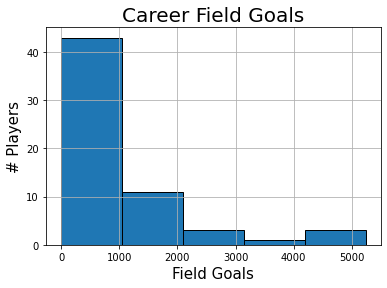

In [32]:
FTP2['FG'].hist(edgecolor='black', bins =5)
plt.xlabel('Field Goals', fontsize=15)
plt.ylabel('# Players', fontsize=15)
plt.title('Career Field Goals', fontsize=20)

### Descriptive Statistics of Points

In [33]:
FTP2['PTS'].describe()

count       61.000000
mean      2066.344262
std       2987.715420
min          0.000000
25%         81.000000
50%        827.000000
75%       3276.000000
max      12391.000000
Name: PTS, dtype: float64

### Histogram of Points

Text(0.5, 1.0, 'Career Points')

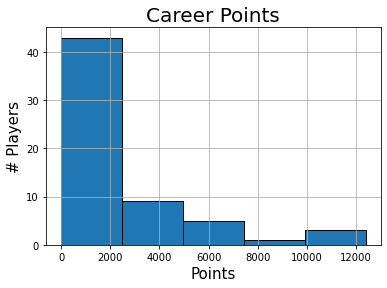

In [34]:
FTP2['PTS'].hist(edgecolor='black', bins =5)
plt.xlabel('Points', fontsize=15)
plt.ylabel('# Players', fontsize=15)
plt.title('Career Points', fontsize=20)

# -------------------------------------------------------------------------------------------------------------

# Now lets see how to check on  UL players  in the virtual NBA world of Top Shots using Jordan Nwora as an example:`

# -------------------------------------------------------------------------------------------------------------

## Jordan Nwora

[Click to see Jordan Nwora's Top Shot Moment](https://www.nbatopshot.com/listings/p2p/208ae30a-a4fe-42d4-9e51-e6fd1ad2a7a9+410fa4dd-cfc3-4bba-b0e0-4b623e9d8c41)

### Jordan Nwora Crypto Slam info:

In [35]:
from IPython.display import IFrame
url = 'https://cryptoslam.io/nba-top-shot/mint/3291416'
IFrame(url,900,400)

### Jordan Nwora NBA Top Shot moment asking prices:

In [36]:
nwora = pd.read_excel('NworaNone.xlsx')

In [37]:
nwora

,Asking
0,999
1,555
2,500
3,999
4,1300
...,...
133,198
134,168
135,320
136,200


### Check for NA values by comparing count (non-na prices) with size (all prices) and using isna():

In [38]:
nwora.size == nwora.count()

Asking    True
dtype: bool

In [39]:
nwora.isna().sum()

Asking    0
dtype: int64

### Jordan Nwora NBA Top Shot moment medain and mean prices:

In [40]:
nwora.median()

Asking    272.0
dtype: float64

In [41]:
nwora.mean()

Asking    373.391304
dtype: float64

### Jordan Nwora NBA Top Shot moment maximum and minimum prices:

In [ ]:
nwora.max()

In [ ]:
nwora.min()

In [ ]:
nwora.agg(['min', 'max'])

### Jordan Nwora NBA Top Shot moment price standard deviation:

In [ ]:
nwora.std()

### Jordan Nwora NBA Top Shot moment price count:

In [ ]:
nwora.count()

### Jordan Nwora NBA Top Shot moment quantile:

In [ ]:
nwora.quantile()

### Find the number of moment asking prices above 1000 dollars:

In [ ]:
(nwora > 1000).sum()

### Find the number of moment asking prices between 500 and 1000 dollars (note that between() can only be used on Series):

In [ ]:
nwora['Asking'].between(500,1000).sum()

### Find the number of moment asking prices below 500 dollars:

In [ ]:
(nwora <500).sum()

### Display asking price by 10 percentiles:

In [ ]:
nwora.quantile(q=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

## Jordan Nwora histogram of his NBA Top Shot asking prices:

In [ ]:
nwora['Asking'].hist(edgecolor='black', bins =5)
plt.xlabel('Price(Dollars)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Asking Prices', fontsize=20)

## Jordan Nwora Seaborn histogram :

In [ ]:
sns.displot(nwora['Asking'])

## Jordan Nwora's NBA Top Shot  asking prices by Serial Number scatterplot:

In [ ]:
nworaminus2=pd.read_excel('NworaNewMinus.xlsx')
nworaminus2.plot.scatter(x='Serial #', y = 'Asking Price')

## Jordan Nwora's NBA Top Shot  asking prices by Serial Number line plot:

In [ ]:
nworaminus=pd.read_excel('NworaNewMinus.xlsx', index_col='Serial #')

In [ ]:
nworaminus.plot(kind='line', title = 'Line Plot')